<a href="https://colab.research.google.com/github/AyonnaJ/COGS-202-HW/blob/main/My_Titanic_Jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [45]:
train = pd.read_csv("train.csv")
train.head()

#aything without a comment is your code @ Jeff. Chunks with comments are mine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
#got this from the kaggle titanic tutorial

% of women who survived: 0.7420382165605095


In [48]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)
#got this from the kaggle titanic tutorial

% of men who survived: 0.18890814558058924


In [49]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
#got this from the kaggle titanic tutorial

Your submission was successfully saved!


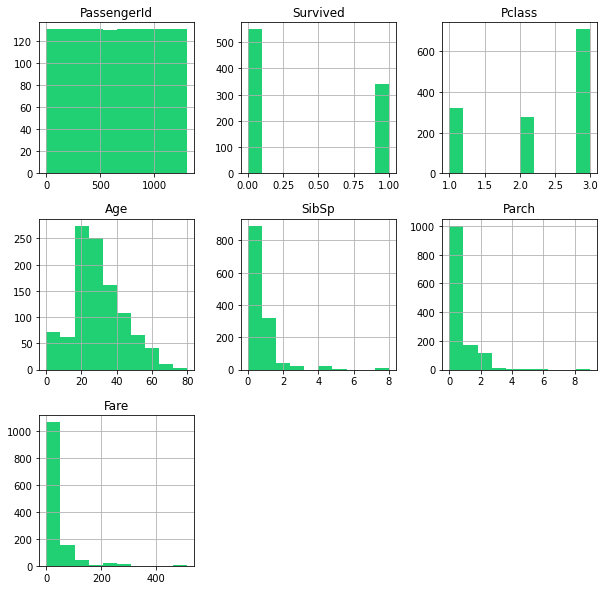

In [50]:
all_data = train.append(test)
all_data.describe()

all_data.hist(figsize=(10,10), color = "#20D073");

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
def plot_missing_data(dataset, title):
  fig, ax = plt.subplots(figsize = (5,5))
  plt.title(title)
  sns.heatmap(dataset.isnull(), cbar = False)

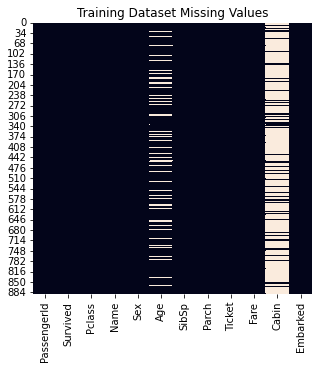

In [53]:
plot_missing_data(train, "Training Dataset Missing Values")
#features with missing values - age and cabin

In [54]:
train['Survived']. value_counts(normalize = True)
#amount of passengers who survived

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [55]:
def bar_compare(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
  fig, ax = plt.subplots(figsize = fsize)
  ax.set_title(title)
  sns.distplot(train[feature], color = "#A44AF6", bins = bins, ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


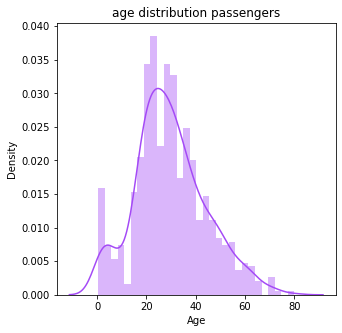

In [56]:
bar_compare(train, "Age", "age distribution passengers")
#wanted to see if age influenced survival

In [57]:
# All Chunks from here down aer from your code. Wasnt quite sure how I could midify this to make it my own, nor how to make my own from scratch
train_in = train[['Age','SibSp','Fare']]
test_in = test[['Age','SibSp','Fare']]

In [58]:

train_in = train_in.join(pd.get_dummies(train['Pclass']))
train_in = train_in.join(pd.get_dummies(train['Sex']))
train_in = train_in.join(pd.get_dummies(train['Embarked']))

test_in = test_in.join(pd.get_dummies(test['Pclass']))
test_in = test_in.join(pd.get_dummies(test['Sex']))
test_in = test_in.join(pd.get_dummies(test['Embarked']))

In [59]:

train_in = train_in.fillna(-1)
test_in = test_in.fillna(-1)

In [60]:

scaler = MinMaxScaler()
train_in[['Age', 'Fare']] = scaler.fit_transform(train_in[['Age', 'Fare']])
test_in[['Age', 'Fare']] = scaler.fit_transform(test_in[['Age', 'Fare']])

In [61]:

targets = train['Survived']


In [62]:
svm_linear = svm.SVC(kernel='linear', C=1,gamma='auto')

In [63]:
svm_linear.fit(train_in.values, targets.values)
cv_score = cross_val_score(svm_linear, train_in.values, targets.values, cv=5, scoring = 'accuracy');
print(svm_linear, "\n")
print("CV Score:",cv_score, "\n")


SVC(C=1, gamma='auto', kernel='linear') 

CV Score: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685] 



In [64]:

predictions = svm_linear.predict(test_in.values)

In [65]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [66]:
submission.to_csv("submission.csv", index=False)